# Housing Prices

In [38]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import warnings

warnings.filterwarnings("ignore")




# Linear Regression

In [6]:
# model
def f_wb(x,w,b):
  m = x.shape[0]
  estimate= np.zeros(m)
  for i in range(m):
    estimate[i] = w * x[i] + b
  return estimate

# cost function
def cost(x,w,b):
  m = x.shape[0]
  J = 0
  for i in range(m):
    J_i = 1/(2*m) * (f_wb(x_train,w,b)[i] - y_train[i])**2
    J = J + J_i
  return J 

def differential(x,w,b):
  m = x.shape[0]
  d_w = 0
  d_b = 0
  for i in range(m):
    d_w_i = 1/m * (f_wb(x,w,b)[i] - y_train[i]) * x[i]
    d_b_i = 1/m * (f_wb(x,w,b)[i] - y_train[i])
    d_w = d_w + d_w_i
    d_b = d_b + d_b_i
  return d_w, d_b


def regression(x, w_initial, b_initial, alfa, iterations):
  w = w_initial
  b = b_initial
  for i in range(iterations):
    print(f"total cost: {cost(x_train,w,b)}")
    w_updated = w - alfa * differential(x,w,b)[0]
    b_updated = b - alfa * differential(x,w,b)[1]
    w = w_updated
    b = b_updated
  return w,b

# Descriptive Analysis

In [8]:
# Importing The Dataset

path = os.path.join("Resources", "Housing.csv")
df = pd.read_csv(path)

# Descriptive Analysis

data_points = df.count()
null_values = df.isnull().sum()
data_type = df.dtypes

print(f"{null_values}/n/n{data_points}/n/n{data_type}")



price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64/n/nprice               545
area                545
bedrooms            545
bathrooms           545
stories             545
mainroad            545
guestroom           545
basement            545
hotwaterheating     545
airconditioning     545
parking             545
prefarea            545
furnishingstatus    545
dtype: int64/n/nprice                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


# Analyzing the price

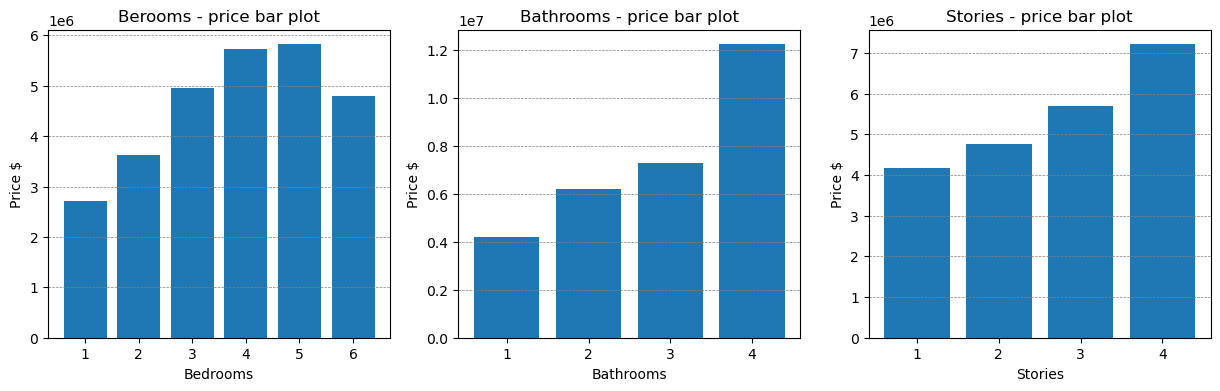

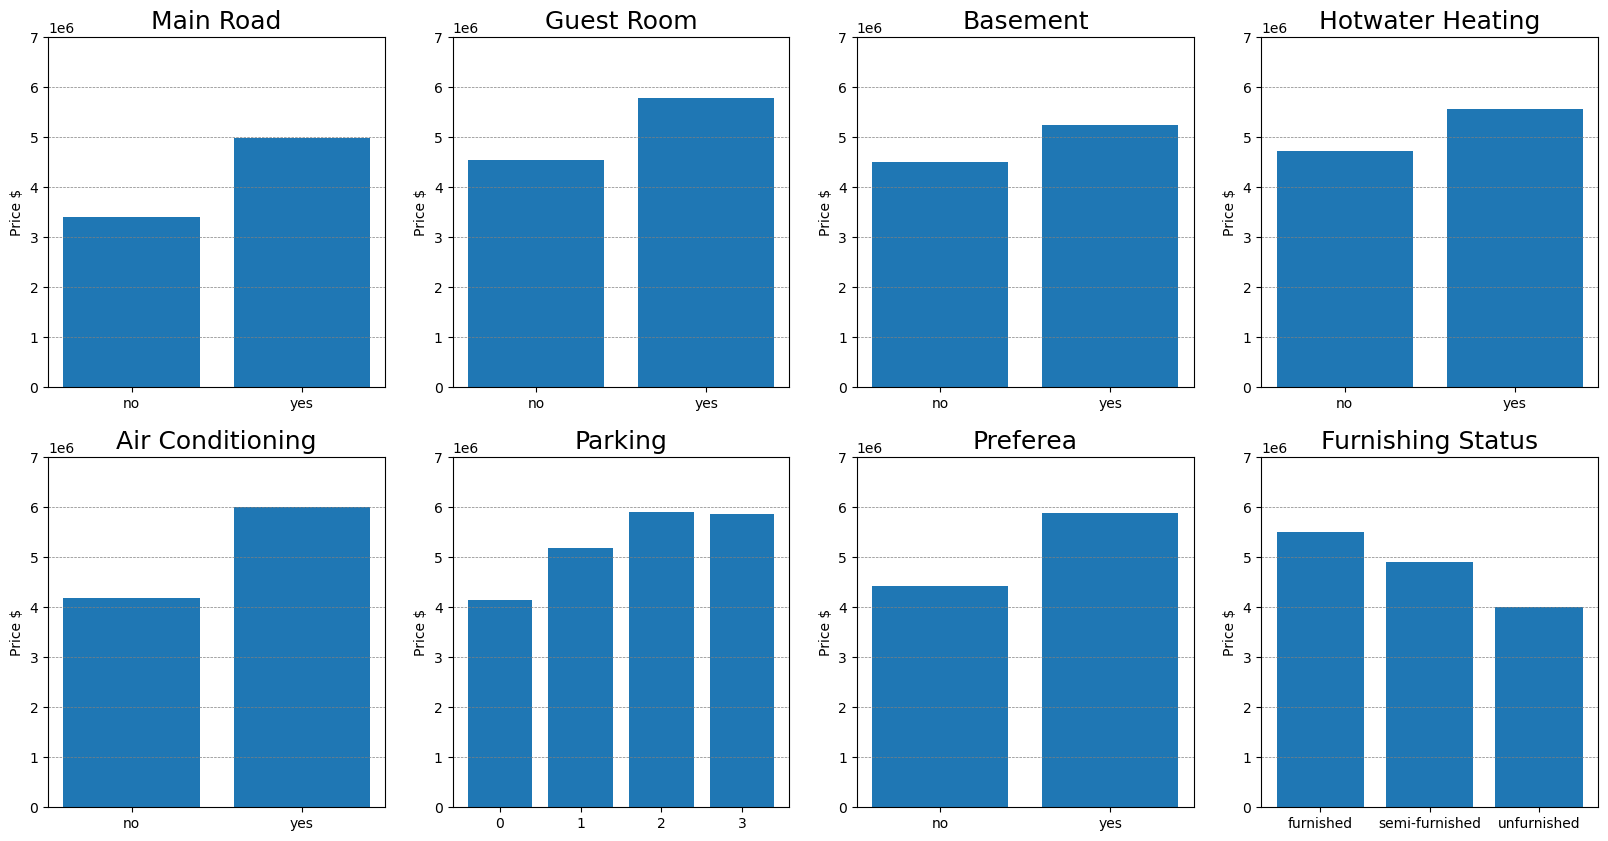

In [77]:
df_by_bedrooms = df.groupby(["bedrooms"]).mean()["price"]
df_by_bedrooms = df_by_area.sort_values()

df_by_bathrooms = df.groupby(["bathrooms"]).mean()["price"]
df_by_bathrooms = df_by_bathrooms.sort_values()

df_by_stories = df.groupby(["stories"]).mean()["price"]
df_by_stories = df_by_stories.sort_values()

fig, axes = plt.subplots(1,3, figsize = (15,4))
axes[0].bar(df_by_bedrooms.index,df_by_bedrooms)
axes[0].set_title("Berooms - price bar plot", fontsize = 12)
axes[0].set_xlabel("Bedrooms", fontsize = 10)
axes[0].set_ylabel("Price $", fontsize = 10)
axes[0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

axes[1].bar(df_by_bathrooms.index,df_by_bathrooms)
axes[1].set_title("Bathrooms - price bar plot", fontsize = 12)
axes[1].set_xlabel("Bathrooms", fontsize = 10)
axes[1].set_ylabel("Price $", fontsize = 10)
axes[1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

axes[2].bar(df_by_stories.index,df_by_stories)
axes[2].set_title("Stories - price bar plot", fontsize = 12)
axes[2].set_xlabel("Stories", fontsize = 10)
axes[2].set_ylabel("Price $", fontsize = 10)
axes[2].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
plt.show()


main_road_df = df.groupby(["mainroad"]).mean()["price"]
guestroom_df = df.groupby(["guestroom"]).mean()["price"]
basement_df = df.groupby(["basement"]).mean()["price"]
hotwaterheating_df = df.groupby(["hotwaterheating"]).mean()["price"]
airconditioning_df = df.groupby(["airconditioning"]).mean()["price"]
parking_df = df.groupby(["parking"]).mean()["price"]
prefarea_df = df.groupby(["prefarea"]).mean()["price"]
furnishingstatus_df = df.groupby(["furnishingstatus"]).mean()["price"]


fig, axes = plt.subplots(2,4, figsize = (20,10))
axes[0,0].bar(main_road_df.index, main_road_df)
axes[0,0].set_title("Main Road", fontsize = 18)
axes[0,0].set_ylabel("Price $")
axes[0,0].set_ylim([0,7000000])

axes[0,1].bar(guestroom_df.index, guestroom_df)
axes[0,1].set_title("Guest Room", fontsize = 18)
axes[0,1].set_ylabel("Price $")
axes[0,1].set_ylim([0,7000000])

axes[0,2].bar(basement_df.index, basement_df)
axes[0,2].set_title("Basement", fontsize = 18)
axes[0,2].set_ylabel("Price $")
axes[0,2].set_ylim([0,7000000])

axes[0,3].bar(hotwaterheating_df.index, hotwaterheating_df)
axes[0,3].set_title("Hotwater Heating", fontsize = 18)
axes[0,3].set_ylabel("Price $")
axes[0,3].set_ylim([0,7000000])

axes[1,0].bar(airconditioning_df.index, airconditioning_df)
axes[1,0].set_title("Air Conditioning", fontsize = 18)
axes[1,0].set_ylabel("Price $")
axes[1,0].set_ylim([0,7000000])

axes[1,1].bar(parking_df.index, parking_df)
axes[1,1].set_title("Parking", fontsize = 18)
axes[1,1].set_ylabel("Price $")
axes[1,1].set_ylim([0,7000000])

axes[1,2].bar(prefarea_df.index, prefarea_df)
axes[1,2].set_title("Preferea", fontsize = 18)
axes[1,2].set_ylabel("Price $")
axes[1,2].set_ylim([0,7000000])

axes[1,3].bar(furnishingstatus_df.index, furnishingstatus_df)
axes[1,3].set_title("Furnishing Status", fontsize = 18)
axes[1,3].set_ylabel("Price $")
axes[1,3].set_ylim([0,7000000])

for i in range(4):
    for j in range(2):
        axes[j,i].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.show()

# Price Vs Area

total cost: 13080204297504.107
total cost: 7068190193417.09
total cost: 4224833544713.748
total cost: 2880080040495.2188
total cost: 2244084556442.0034
total cost: 1943293180959.7422
total cost: 1801035171176.3018
total cost: 1733754846323.2373
total cost: 1701934900506.0684
total cost: 1686885791005.574
total cost: 1679768377623.5967
total cost: 1676402226380.7744
total cost: 1674810218704.012
total cost: 1674057284724.6433
total cost: 1673701187102.3364
total cost: 1673532771557.0315
total cost: 1673453119456.409
total cost: 1673415447651.6072
total cost: 1673397630250.187
total cost: 1673389202904.8975


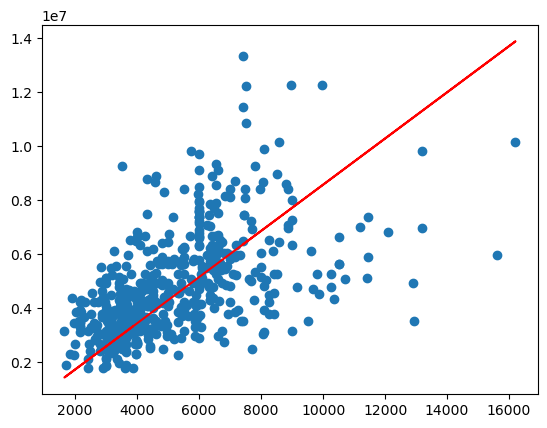

In [78]:
x_train = df["area"]
y_train = df["price"]
w,b = regression(x_train,1,1,0.00000001,20)
plt.scatter(df["area"], df["price"])
plt.plot(df["area"], f_wb(x_train, w, b),c = 'r')
plt.
plt.show()